In [1]:
import pandas as pd
import numpy as np
import math
import random
import pickle
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import difflib
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/lustre/user/lulab/doushq/wuxk/software/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [7]:
RPKM_df = pd.read_csv("../Data/RPKM_fly_cds.csv",sep='\t')
# 1. devide
# high
high_gene = RPKM_df[RPKM_df['RPKM']>=10]['geneid'].values
# middle
middle_gene = RPKM_df[(RPKM_df['RPKM']>=1.5)&(RPKM_df['RPKM']<10)]['geneid'].values
# low
low_gene = RPKM_df[RPKM_df['RPKM']<1.5]['geneid'].values
print(len(high_gene),len(middle_gene),len(low_gene))

4565 4817 4517


In [18]:
usedTr = pd.read_csv("../Data/dmel-all-r6.04.canonical.transcripts.txt",
                    sep="\t",header=None)
usedTr.columns = ['Name','Geneid','Trid','Length']

# short intron ploy
shortIntron_poly_df = pd.read_csv("../Data/pol_site_short_intron_clean.txt")
print(shortIntron_poly_df.shape)
shortIntron_poly_link = pd.read_csv("../Data/pol_site_short_intron_clean_link",
                                   sep="\t",header=None)
shortIntron_poly_link.columns = ['id','Trid']
shortIntron_poly_link = pd.merge(shortIntron_poly_link,usedTr[['Geneid','Trid']],on='Trid',how='left')
del shortIntron_poly_link['Trid']
shortIntron_poly_link = shortIntron_poly_link[~shortIntron_poly_link['id'].duplicated(keep=False)]
shortIntron_poly_df = pd.merge(shortIntron_poly_df,shortIntron_poly_link,on='id')

(21478, 14)


MannwhitneyuResult(statistic=672796434.5, pvalue=1.7296803380293708e-18)
MannwhitneyuResult(statistic=2263416457.0, pvalue=7.878939706716695e-31)
MannwhitneyuResult(statistic=47488775.0, pvalue=2.9871687785302065e-05)
MannwhitneyuResult(statistic=184699584.5, pvalue=2.762615715015943e-13)
MannwhitneyuResult(statistic=133837474.0, pvalue=4.996741909039678e-06)
MannwhitneyuResult(statistic=436569228.0, pvalue=1.6222944313556112e-16)
MannwhitneyuResult(statistic=55775774.5, pvalue=2.6011414170765614e-10)
MannwhitneyuResult(statistic=171538003.0, pvalue=2.344004174837761e-05)


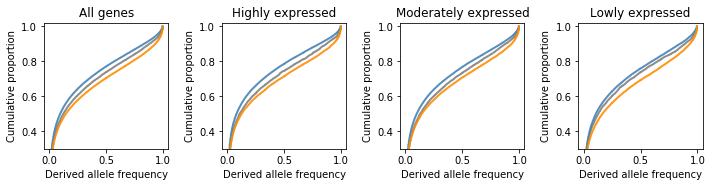

In [19]:
plt.figure(figsize=(10,2.7))

all_gene = RPKM_df['geneid'].values
plt.subplot(1,4,1)
used_gene = all_gene
ploy_syn_tmp = ploy_syn_df[ploy_syn_df['GENEID'].isin(used_gene)]

shortIntron_poly_tmp = shortIntron_poly_df[shortIntron_poly_df['Geneid'].isin(used_gene)]
sorted_data = np.sort(shortIntron_poly_tmp['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='gray', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='steelblue', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='darkorange', linestyle='-',alpha=0.9,linewidth=2)
plt.ylim(0.3,1.02)
plt.xlabel("Derived allele frequency")
plt.ylabel("Cumulative proportion")
plt.title("All genes")
print(stats.mannwhitneyu(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'],
                         shortIntron_poly_tmp['daf']))
print(stats.mannwhitneyu(shortIntron_poly_tmp['daf'],
                         ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf']))

plt.subplot(1,4,2)
used_gene = high_gene
ploy_syn_tmp = ploy_syn_df[ploy_syn_df['GENEID'].isin(used_gene)]

shortIntron_poly_tmp = shortIntron_poly_df[shortIntron_poly_df['Geneid'].isin(used_gene)]
sorted_data = np.sort(shortIntron_poly_tmp['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='gray', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='steelblue', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='darkorange', linestyle='-',alpha=0.9,linewidth=2)
plt.ylim(0.3,1.02)
plt.xlabel("Derived allele frequency")
plt.ylabel("Cumulative proportion")
plt.title("Highly expressed")
print(stats.mannwhitneyu(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'],
                         shortIntron_poly_tmp['daf']))
print(stats.mannwhitneyu(shortIntron_poly_tmp['daf'],
                         ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf']))

plt.subplot(1,4,3)
used_gene = middle_gene
ploy_syn_tmp = ploy_syn_df[ploy_syn_df['GENEID'].isin(used_gene)]

shortIntron_poly_tmp = shortIntron_poly_df[shortIntron_poly_df['Geneid'].isin(used_gene)]
sorted_data = np.sort(shortIntron_poly_tmp['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='gray', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='steelblue', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='darkorange', linestyle='-',alpha=0.9,linewidth=2)
plt.ylim(0.3,1.02)
plt.xlabel("Derived allele frequency")
plt.ylabel("Cumulative proportion")
plt.title("Moderately expressed")
print(stats.mannwhitneyu(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'],
                          shortIntron_poly_tmp['daf']))
print(stats.mannwhitneyu( shortIntron_poly_tmp['daf'],
                         ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf']))

plt.subplot(1,4,4)
used_gene = low_gene
ploy_syn_tmp = ploy_syn_df[ploy_syn_df['GENEID'].isin(used_gene)]

shortIntron_poly_tmp = shortIntron_poly_df[shortIntron_poly_df['Geneid'].isin(used_gene)]
sorted_data = np.sort(shortIntron_poly_tmp['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='gray', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='steelblue', linestyle='-',alpha=0.9,linewidth=2)

sorted_data = np.sort(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf,color='darkorange', linestyle='-',alpha=0.9,linewidth=2)
plt.ylim(0.3,1.02)
plt.xlabel("Derived allele frequency")
plt.ylabel("Cumulative proportion")
plt.title("Lowly expressed")
print(stats.mannwhitneyu(ploy_syn_tmp[ploy_syn_tmp['category'] == 'optimization']['daf'],
                          shortIntron_poly_tmp['daf']))
print(stats.mannwhitneyu( shortIntron_poly_tmp['daf'],
                         ploy_syn_tmp[ploy_syn_tmp['category'] == 'deoptimization']['daf']))

plt.tight_layout()

#### MK Test (An Example)

In [2]:
def K80fix(ts,tv):
    """
    K80 adjust
    """
    pts = ts/(ts+tv) *0.05
    qtv = tv/(ts+tv) *0.05
    w1 = 1 - 2 * pts - qtv
    w2 = 1 - 2 * qtv
    return( (-0.5 * math.log(w1) - 0.25 *math.log(w2)) * (ts + tv)/0.05)


def substitutionType(ref,alt):
    """
    substitution Type
    """
    Purine = ['A','G']
    Pyrimidine = ['T','C']
    typeidentify = 0
    if ref in Purine:
        typeidentify += 1
        if alt in Pyrimidine:
            typeidentify += 1
    else:
        typeidentify += 1
        if alt in Purine:
            typeidentify += 1

    if typeidentify == 1:
        st = 'ts'
    else:
        st = 'tv'
    return st

categories = np.linspace(5,95,num=101)
group = np.arange(1,101) -1

count = 0
record = 0
median = []
for i in categories:
    if count == 0:
        count += 1
        record = i
    else:
        count += 1
        median.append((i+record)/2)
        record = i

class_List =[group,median]
class_ListDf = pd.DataFrame(class_List).transpose()
class_ListDf.columns = ['classes','center']

def category(frequency,classes):
    """
    """
    frequency = [frequency]
    group = pd.cut(frequency,classes,labels=False)
    group = group[0]
    return group

In [26]:
maf_fixed_df = pd.read_csv("../Data/FixedSites_all_202307.csv.gz",
                          sep="\t")
maf_fixed_df['site_id'] = maf_fixed_df.apply(lambda x: x['chrom'] + '_' + str(x['position']+1),axis=1) # 0 base to 1 base

In [27]:
used_gene = low_gene

fixed_cds_df = pd.read_csv("../Data/fixed_site_cds_clean_annotated.txt",sep="\t")
fixed_cds_df = fixed_cds_df[fixed_cds_df['gene'].isin(used_gene)] # remove other genes
###
print(fixed_cds_df.shape)
# mel！=（sec==yak）
fixed_cds_adjusted = fixed_cds_df[fixed_cds_df['site_id'].isin(maf_fixed_df['site_id'])]
fixed_cds_df = fixed_cds_adjusted.copy()
print(fixed_cds_df.shape)

# short intron fixed
shortIntron_fixed_df = pd.read_csv("../Data/fixed_site_short_intron_noyak_clean.txt")
print(shortIntron_fixed_df.shape)
shortIntron_fixed_link = pd.read_csv("../Data/fixed_site_short_intron_noyak_clean_link",
                                   sep="\t",header=None)
shortIntron_fixed_link.columns = ['site_id','Trid']
shortIntron_fixed_link = pd.merge(shortIntron_fixed_link,usedTr[['Geneid','Trid']],on='Trid',how='left')
del shortIntron_fixed_link['Trid']
shortIntron_fixed_link = shortIntron_fixed_link[~shortIntron_fixed_link['site_id'].duplicated(keep=False)]
shortIntron_fixed_df = pd.merge(shortIntron_fixed_df,shortIntron_fixed_link,on='site_id')
print(shortIntron_fixed_df.shape)
shortIntron_fixed_df = shortIntron_fixed_df[shortIntron_fixed_df['Geneid'].isin(used_gene)]

fixed_shortintron_df = shortIntron_fixed_df.copy()
###
fixed_cds_adjusted = fixed_shortintron_df[fixed_shortintron_df['site_id'].isin(maf_fixed_df['site_id'])]
fixed_shortintron_df = fixed_cds_adjusted.copy()
print(fixed_shortintron_df.shape)

poly_cds_df = pd.read_csv("../Data/pol_site_cds_clean.txt",sep=",")
poly_cds_df = poly_cds_df[poly_cds_df['GENEID'].isin(used_gene)] # remove other genes

# short intron ploy 
shortIntron_poly_df = pd.read_csv("../Data/pol_site_short_intron_clean.txt")
print(shortIntron_poly_df.shape)
shortIntron_poly_link = pd.read_csv("../Data/pol_site_short_intron_clean_link",
                                   sep="\t",header=None)
shortIntron_poly_link.columns = ['id','Trid']
shortIntron_poly_link = pd.merge(shortIntron_poly_link,usedTr[['Geneid','Trid']],on='Trid',how='left')
del shortIntron_poly_link['Trid']
shortIntron_poly_link = shortIntron_poly_link[~shortIntron_poly_link['id'].duplicated(keep=False)]
shortIntron_poly_df = pd.merge(shortIntron_poly_df,shortIntron_poly_link,on='id')
shortIntron_poly_df = shortIntron_poly_df[shortIntron_poly_df['Geneid'].isin(used_gene)]
print(shortIntron_poly_df.shape)

poly_shortintron_df = shortIntron_poly_df.copy()

### Fixed sites
# neutral fixed sites
k80fixed_neutral = K80fix(fixed_shortintron_df[fixed_shortintron_df['mut_tag'] == 'S'].shape[0],
                          fixed_shortintron_df[fixed_shortintron_df['mut_tag'] == 'V'].shape[0])

# neutral poly sites
variableSitesNeutralPol = poly_shortintron_df[(poly_shortintron_df['daf']>0.05) & (poly_shortintron_df['daf']<0.95)]
variableSitesNeutralPol['classes'] = variableSitesNeutralPol.apply(lambda x: category(x['daf']*100, categories),axis = 1)
variableSitesNeutralPol = pd.merge(variableSitesNeutralPol,class_ListDf,on='classes',how='left')
variableSitesNeutralPol.center = variableSitesNeutralPol.center/100
variableSitesNeutralPol_clean = variableSitesNeutralPol[['chrm','posn','ref','alt','center']].drop_duplicates()
variableSitesNeutralPol_clean_grouped = variableSitesNeutralPol_clean.groupby('center')['chrm'].count().reset_index()
variableSitesNeutralPol_clean_grouped.columns = ['x','pS']

with open("../Data/fly_rscu.pkl", "rb") as handle:
    RSCU_dict = pickle.load(handle)

fixed_syn_df = fixed_cds_df[fixed_cds_df['type'] == 'Syn']
fixed_syn_df['RSCU_diff'] = fixed_syn_df.apply(lambda x: RSCU_dict[x['dm6_codon']] - RSCU_dict[x['sec_condon']],axis=1)
fixed_syn_df['category'] = ['optimization' if i >0 else 'deoptimization' for i in fixed_syn_df['RSCU_diff']]

fixed_syn_op = fixed_syn_df[fixed_syn_df['category'] == 'optimization']
fixed_syn_de = fixed_syn_df[fixed_syn_df['category'] == 'deoptimization']

k80fixed_op = K80fix(fixed_syn_op[fixed_syn_op['mut_tag'] == 'S'].shape[0],
                          fixed_syn_op[fixed_syn_op['mut_tag'] == 'V'].shape[0])
k80fixed_de = K80fix(fixed_syn_de[fixed_syn_de['mut_tag'] == 'S'].shape[0],
                          fixed_syn_de[fixed_syn_de['mut_tag'] == 'V'].shape[0])

ploy_syn_df = poly_cds_df[poly_cds_df['type'] == 'Syn']
ploy_syn_df['RSCU_diff'] = ploy_syn_df.apply(lambda x: RSCU_dict[x['der_codon']] - RSCU_dict[x['anc_codon']],axis=1)
ploy_syn_df['category'] = ['optimization' if i >0 else 'deoptimization' for i in ploy_syn_df['RSCU_diff']]
poly_syn_op = ploy_syn_df[ploy_syn_df['category'] == 'optimization']
poly_syn_de = ploy_syn_df[ploy_syn_df['category'] == 'deoptimization']

poly_syn_op = poly_syn_op[(poly_syn_op['daf']>0.05) & (poly_syn_op['daf']<0.95)]
poly_syn_op['classes'] = poly_syn_op.apply(lambda x: category(x['daf']*100, categories),axis = 1)
poly_syn_op = pd.merge(poly_syn_op,class_ListDf,on='classes',how='left')
poly_syn_op.center = poly_syn_op.center/100
poly_syn_op_clean = poly_syn_op[['chrm','posn','ref','alt','center']].drop_duplicates()
poly_syn_op_clean_grouped = poly_syn_op_clean.groupby('center')['chrm'].count().reset_index()
poly_syn_op_clean_grouped.columns = ['x','pS']

poly_syn_de = poly_syn_de[(poly_syn_de['daf']>0.05) & (poly_syn_de['daf']<0.95)]
poly_syn_de['classes'] = poly_syn_de.apply(lambda x: category(x['daf']*100, categories),axis = 1)
poly_syn_de = pd.merge(poly_syn_de,class_ListDf,on='classes',how='left')
poly_syn_de.center = poly_syn_de.center/100
poly_syn_de_clean = poly_syn_de[['chrm','posn','ref','alt','center']].drop_duplicates()
poly_syn_de_clean_grouped = poly_syn_de_clean.groupby('center')['chrm'].count().reset_index()
poly_syn_de_clean_grouped.columns = ['x','pS']

total_op = pd.merge(poly_syn_op_clean_grouped,variableSitesNeutralPol_clean_grouped,on='x')
total_op.columns = ['x','pN','pS']
total_op.to_csv('expression_op_MKtest_update', sep="\t", index=False)

total_de = pd.merge(poly_syn_de_clean_grouped,variableSitesNeutralPol_clean_grouped,on='x')
total_de.columns = ['x','pN','pS']
total_de.to_csv('expression_de_MKtest_update', sep="\t", index=False)

(241807, 15)
(87721, 15)
(39200, 13)
(36833, 14)
(3281, 14)
(21478, 14)
(5381, 15)


In [28]:
# op
outname1 = 'expression_op_MKtest_update'
command = 'Rscript ../Data/asymptoticMK_local_modi.R ' + str(k80fixed_op) + ' ' + str(k80fixed_neutral) + ' ' + outname1
alphaResult=os.popen(command).readlines()
alphaResult = alphaResult[-20:-1]
alpha_tmp = difflib.get_close_matches("alpha_asymptotic\t",alphaResult,1, cutoff=0.5)[0].strip('\n')
upper_tmp = difflib.get_close_matches("upper",alphaResult,1, cutoff=0.2)[0].strip('\n')
lower_tmp = difflib.get_close_matches("lower",alphaResult,1, cutoff=0.2)[0].strip('\n')
alpha_original_tmp = difflib.get_close_matches("alpha_original",alphaResult,1, cutoff=0.2)[0].strip('\n')
print(alpha_tmp,lower_tmp,upper_tmp,alpha_original_tmp)

alpha_asymptotic	-0.16233  95% CI(lower)	-0.27252  95% CI(upper)	-0.052136  alpha_original	0.094654 


In [29]:
# de
outname1 = 'expression_de_MKtest_update'
command = 'Rscript ../Data/asymptoticMK_local_modi.R ' + str(k80fixed_de) + ' ' + str(k80fixed_neutral) + ' ' + outname1
alphaResult=os.popen(command).readlines()
alphaResult = alphaResult[-20:-1]
alpha_tmp = difflib.get_close_matches("alpha_asymptotic\t",alphaResult,1, cutoff=0.5)[0].strip('\n')
upper_tmp = difflib.get_close_matches("upper",alphaResult,1, cutoff=0.2)[0].strip('\n')
lower_tmp = difflib.get_close_matches("lower",alphaResult,1, cutoff=0.2)[0].strip('\n')
alpha_original_tmp = difflib.get_close_matches("alpha_original",alphaResult,1, cutoff=0.2)[0].strip('\n')
print(alpha_tmp,lower_tmp,upper_tmp,alpha_original_tmp)

alpha_asymptotic	-0.10032  95% CI(lower)	-0.22405  95% CI(upper)	0.023417  alpha_original	-0.068491 


In [16]:
### figure plot
# alpha result visualization

data = [[-0.025,-0.076,0.026],[0.014,-0.039,0.066],
        [0.11838,0.066282,0.17047],[0.14791,0.098145,0.19767],
        [-0.0044108,-0.060594,0.051772],[-0.011609,-0.06588,0.042661],
        [-0.17836,-0.24907,-0.10766],[-0.098643,-0.16343,-0.033851],
        [-0.0074597,-0.10787,0.092949],[0.02800,-0.076564,0.13256],
        [-0.020017,-0.097954,0.057919],[-0.031374,-0.11682,0.054068],
        [-0.16233,-0.27252,-0.052136],[-0.10032,-0.22405,0.023417]]
value_df = pd.DataFrame(data,columns =['median','lower','upper'])
value_df['expression'] = ['all_all','all_all','highly_all','highly_all','moderately_all','moderately_all','lowly_all','lowly_all',
                         'highly','highly','moderately','moderately','lowly','lowly']
value_df['category'] = ['optimization','deoptimization','optimization','deoptimization','optimization','deoptimization','optimization','deoptimization','optimization','deoptimization','optimization','deoptimization','optimization','deoptimization']
value_df['se'] = value_df['upper'] - value_df['median']
value_df

,median,lower,upper,expression,category,se
0,-0.025000,-0.076000,0.026000,all_all,optimization,0.051000
1,0.014000,-0.039000,0.066000,all_all,deoptimization,0.052000
2,0.118380,0.066282,0.170470,highly_all,optimization,0.052090
3,0.147910,0.098145,0.197670,highly_all,deoptimization,0.049760
4,-0.004411,-0.060594,0.051772,moderately_all,optimization,0.056183
5,-0.011609,-0.065880,0.042661,moderately_all,deoptimization,0.054270
6,-0.178360,-0.249070,-0.107660,lowly_all,optimization,0.070700
7,-0.098643,-0.163430,-0.033851,lowly_all,deoptimization,0.064792
8,-0.007460,-0.107870,0.092949,highly,optimization,0.100409
9,0.028000,-0.076564,0.132560,highly,deoptimization,0.104560


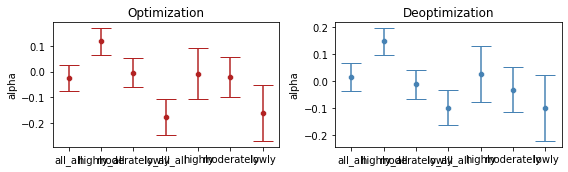

In [17]:
value_opt = value_df[value_df['category'] == 'optimization']
value_deopt = value_df[value_df['category'] == 'deoptimization']

plt.figure(figsize=(8,2.5))
plt.subplot(1,2,1)
sns.scatterplot(x='expression',y='median',data=value_opt,color='firebrick')
plt.errorbar(value_opt['expression'],value_opt['median'],yerr=value_opt['se'],fmt=".",color='firebrick',capsize=10)
plt.xlim(-0.5,6.5)
plt.ylabel("alpha")
plt.xlabel("")
plt.title("Optimization")

plt.subplot(1,2,2)
sns.scatterplot(x='expression',y='median',data=value_deopt,color='steelblue')
plt.errorbar(value_deopt['expression'],value_deopt['median'],yerr=value_deopt['se'],fmt=".",color='steelblue',capsize=10)
plt.xlim(-0.5,6.5)
plt.ylabel("alpha")
plt.xlabel("")
plt.title("Deoptimization")

plt.tight_layout()